# Classification Models with Keras and Scikit-learn - MNIST handwritten digits

# Introduction

In this project, classification of handwritten digits will be performed using the Keras and Scikit-learn libraries. 

Images of digits will be obtained from the MNIST dataset, containing 60,000 training images and 10,000 testing images of digits written by students and employees. 
  

### Table of content:
#### 1. Classification with Keras

    1.1. Importing required libraries / packages  
    1.2. Loading the data  
    1.3. Checking the shape of data sets  
    1.4. Visualize the first images in the training data set  
    1.5. Data preprocessing  
    1.4. Building the Neural Network  
    1.5. Train and Test the Network  
    1.6. Predicting test-set output using the model  
    1.7. Exploring Model's Confusion Matrix  
    1.8. Saving and reloading the model  
  
#### 2. Classification with Scikit-learn  
    2.1. Dimensionality reduction and data visualization  
    2.2. Digit Classification using Gaussian Naive Bayes model  
    2.3. Digits Classification using Random Forest  




# 1. Classification with Keras

## 1.1. Importing required libraries / packages

In [12]:
import keras 

from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## 1.2. Loading the data 
The Keras library includes the MNIST dataset as part of its API. The dataset is readily divided into a training set and a test set.

In [13]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 1.3. Checking the shape of data sets

In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("\nX_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)

X_test shape: (10000, 28, 28)
y_test shape: (10000,)


The X_train dataset contain 60,000 images, and the X_test dataset contain 10,000 images, each of 28x28 pixels.

## 1.4. Visualize the first images in the training data set

### 1.4.1. Visualize the first image:

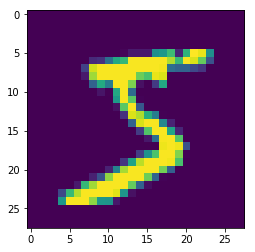

In [15]:
plt.imshow(X_train[0])

### 1.4.2. Visualize the first 100 images and their labels:

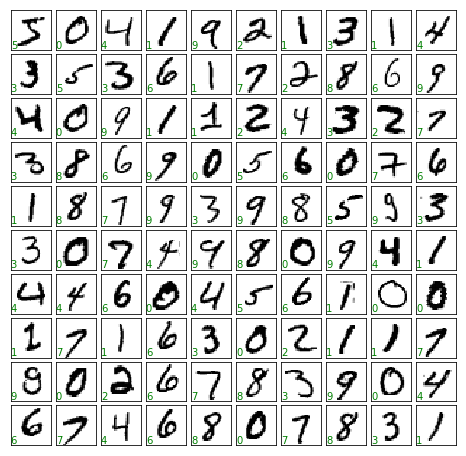

In [16]:
fig, axes = plt.subplots(10,10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat): 
    ax.imshow(X_train[i], cmap='binary', interpolation='nearest')
    ax.text(0, 0.05, str(y_train[i]), transform=ax.transAxes, color='green')

## 1.5. Data preprocessing

### 1.5.1. Flattening the images into one-dimensional vectors 
Conventional neural networks cannot work with image matrix as input, but rather images need to be flatten into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [17]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # finding the size of one-dimensional vector 

X_train_flat = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test_flat = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

### 1.5.2. Normalizing image vectors
Pixels values range from 0 to 255; values are normalized to range between 0 to 1 

In [18]:
X_train_norm = X_train_flat/255
X_test_norm = X_test_flat/255

### 1.5.3. One hot encoding of the target variable 
For classification, the target variable need to be divided into categories. 
This is performed using the to_categorical function from the Keras Utilities package.

In [19]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

num_classes = y_test_cat.shape[1]
print("Number of calasess:", num_classes)
print("y_test shape: ", y_test_cat.shape)
print("y_train shape: ", y_train_cat.shape)
print("X_test shape: ", X_test_norm.shape )
print("X_train shape: ", X_train_norm.shape )


Number of calasess: 10
y_test shape:  (10000, 10)
y_train shape:  (60000, 10)
X_test shape:  (10000, 784)
X_train shape:  (60000, 784)


## 1.4. Building the Neural Network

In [20]:
# define a classification model
def classification_model():
    # create a model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## 1.5. Train and Test the Network

In [21]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train_norm, y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=10, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 82s - loss: 0.1881 - acc: 0.9441 - val_loss: 0.0876 - val_acc: 0.9727
Epoch 2/10
 - 78s - loss: 0.0786 - acc: 0.9757 - val_loss: 0.0842 - val_acc: 0.9736
Epoch 3/10
 - 79s - loss: 0.0561 - acc: 0.9823 - val_loss: 0.0848 - val_acc: 0.9753
Epoch 4/10
 - 81s - loss: 0.0403 - acc: 0.9867 - val_loss: 0.0827 - val_acc: 0.9758
Epoch 5/10
 - 79s - loss: 0.0331 - acc: 0.9890 - val_loss: 0.0867 - val_acc: 0.9783
Epoch 6/10
 - 81s - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0877 - val_acc: 0.9806
Epoch 7/10
 - 79s - loss: 0.0215 - acc: 0.9934 - val_loss: 0.0837 - val_acc: 0.9795
Epoch 8/10
 - 77s - loss: 0.0221 - acc: 0.9931 - val_loss: 0.0838 - val_acc: 0.9785
Epoch 9/10
 - 79s - loss: 0.0155 - acc: 0.9949 - val_loss: 0.0835 - val_acc: 0.9814
Epoch 10/10
 - 81s - loss: 0.0180 - acc: 0.9944 - val_loss: 0.0961 - val_acc: 0.9816


In [23]:
# evaluate the model
scores = model.evaluate(X_test_norm, y_test_cat, verbose=0)
acc = scores[1]*100
err = 100-scores[1]*100

print('Accuracy: %.3f' %acc)
print('Error: %.3f' %err)

Accuracy: 98.160
Error: 1.840


### Model yields prediction accuracy level of >98% 

## 1.6. Predicting test-set output using the model
For each data point, the output of the Keras predict method is the probability of each of the ten classes to be the correct label. The higher the probability the more confident is the algorithm that a datapoint belongs to the respective class. 
For example, for the first data point, the 7th class have the highest probability (almost 1), and therefore the predicted labels for this data point is 7. 

### 1.6.1. Making prediction

In [24]:
y_pred = model.predict(X_test_norm)
print(y_pred[0])

[6.6532419e-21 2.6977968e-15 1.9138263e-16 4.0392443e-14 4.0945913e-17
 6.1982284e-17 2.7791365e-23 1.0000000e+00 1.2520705e-18 1.1419962e-12]


### 1.6.2. Creating an array of predicted targets 
np.argmax is used to return the indices (corresponding to the labels) of each row with the highest probability 

In [25]:
y_pred_label = np.argmax(y_pred, axis=1)
#print(y_pred_label[:100])

## 1.7. Exploring Model's Confusion Matrix  

### 1.7.1. Checking models accuracy using Scikit-learn accuracy_score function

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_label)

0.9816

### 1.7.2. Calculating and displaying the confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix 

con_mat = confusion_matrix(y_test, y_pred_label)
#display(con_mat)

Text(187.80000000000013, 0.5, 'True values')

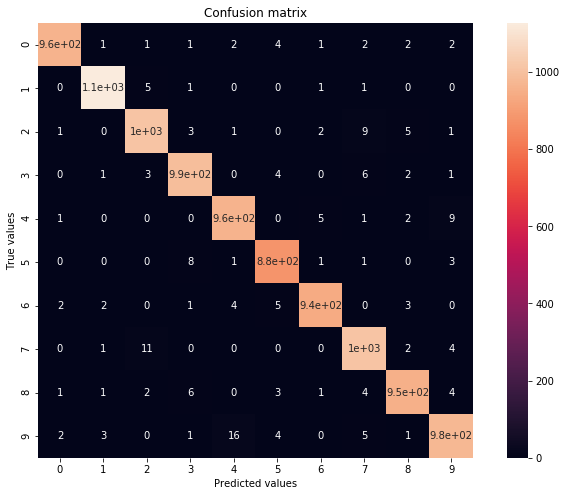

In [28]:
plt.subplots(figsize=(12,8))
sns.heatmap(con_mat, square=True, annot=True, cbar=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('True values')

## 1.8. Saving and reloading the model

### 1.8.1. Saving the model

In [29]:
model.save('classification_model.h5')

### 1.8.2. Reloading the model

In [18]:
from keras.models import load_model

In [19]:
pretrained_model = load_model('classification_model.h5')

# 2. Classification with Scikit-learn

## 2.1. Dimensionality reduction and data visualization  

### 2.1.1 Dimensionality reduction
 Using Isomap manifold learning algorithm to transform the data to 2 dimensions  

In [20]:
# due to limited computational resources,dimensionality reduction was performed only for a portion of the data 

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X_test_norm[:1000])
data_projected = iso.transform(X_test_norm[:1000])

print('Shape of original data set: ', X_test_norm[:1000].shape)
print('Shape of data set after dimensionality reduction: ', data_projected.shape)


Shape of original data set:  (1000, 784)
Shape of data set after dimensionality reduction:  (1000, 2)


### 2.1.2. Visualizing reduced data

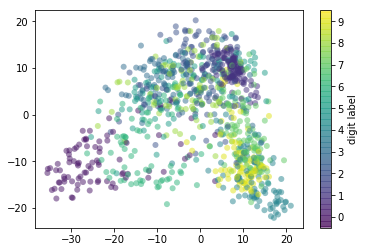

In [21]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=y_test[:1000], edgecolor='none', alpha=0.5) #cmap=plt.cm.get_cmap('spectral',10)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

## 2.2. Digit Classification using Gaussian Naive Bayes model

### 2.2.1 Fitting the model and making prediction 

In [22]:
from sklearn.naive_bayes import GaussianNB
model_Gaus = GaussianNB()
model_Gaus.fit(X_train_flat, y_train)
y_Gaus_pred = model_Gaus.predict(X_test_flat)

### 2.2.2 Checking the accuracy of the model 

In [23]:
accuracy_score(y_test, y_Gaus_pred)

0.5558

### The Gaussian naive Bayes model yields poor prediction accuracy of 55.5%

### 2.2.3. Exploring the model's confusion matrix

Text(0.5, 1.0, 'Naive Bayes Confusion matrix')

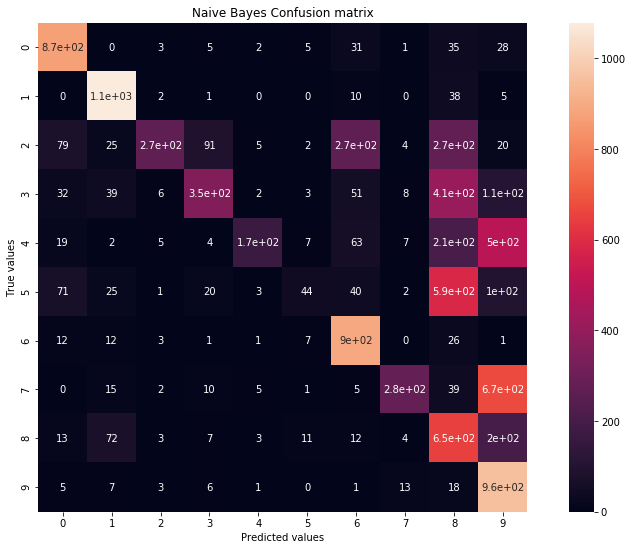

In [24]:
conf_mat_Gaus = confusion_matrix(y_test, y_Gaus_pred)

plt.subplots(figsize=(15,9))
sns.heatmap(conf_mat_Gaus, square=True, annot=True, cbar=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Naive Bayes Confusion matrix')

## 2.3. Digits Classification using Random Forest 

### 2.3.1. Fitting the model and making prediction using different n_estimators

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Modeling 
#finding the optimal n_estimators:
estimators = 110
mean_acc = np.zeros(10)
x=0
for i in range(10,estimators, 10):
    model_RF = RandomForestClassifier(n_estimators=i)
    model_RF.fit(X_train_flat, y_train)
    y_RF_pred = model_RF.predict(X_test_flat)
    mean_acc[x] = accuracy_score(y_test, y_RF_pred)
    x=x+1

### 2.3.2. Visualizing model accuracy as a function of n_estimators

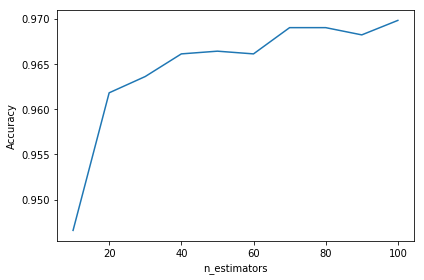

n_estimators = 100 give the best accuracy score with value of 0.9698


In [27]:
plt.plot(range(10,estimators,10),mean_acc)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.tight_layout()
plt.show() 

print("n_estimators =", (mean_acc.argmax()+1)*10,"give the best accuracy score with value of", mean_acc.max())
#print("\nSince depth of 1 is expected to result in underfitting, the second best max_depth = 6 will be used")

### n_estimators of 100 give the best accuracy score  of ~97%

Further iteration with higher n_estimators was not conducted due to limited comutational resources

### 2.3.3. Fitting the model with best n_estimator

In [31]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train_flat, y_train)
y_RF_pred = model_RF.predict(X_test_flat)

### 2.3.4. Exploring the classificatoin report for this classifier

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_RF_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       997
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.96      1038
           3       0.96      0.96      0.96      1011
           4       0.98      0.97      0.97       986
           5       0.96      0.97      0.97       885
           6       0.98      0.97      0.98       965
           7       0.96      0.97      0.97      1017
           8       0.95      0.96      0.96       967
           9       0.95      0.96      0.96       999

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### 2.3.5. Exploring the model's confusion matrix

Text(0.5, 1.0, 'Random Forest Confusion matrix')

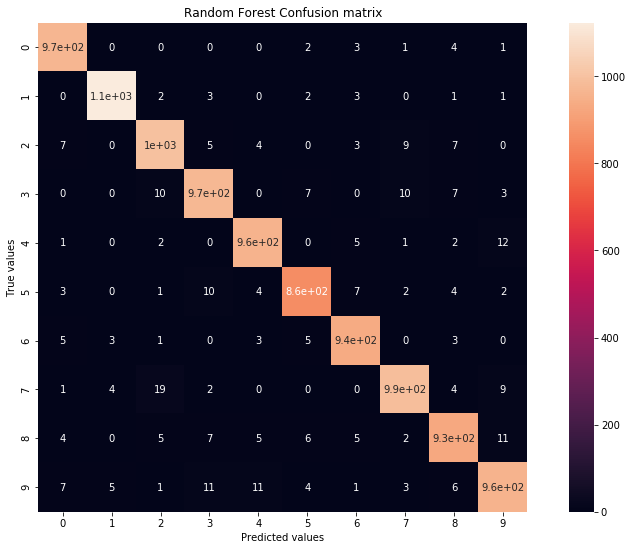

In [33]:
conf_mat_RF = confusion_matrix(y_test, y_RF_pred)

plt.subplots(figsize=(15,9))
sns.heatmap(conf_mat_RF, square=True, annot=True, cbar=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Random Forest Confusion matrix')

### The Random Forest model with the optimal n_estimator yields accuracy of ~97% with F1 weighted average of 0.97